<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_03_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%83%81%EC%B2%AD%EB%82%A0%EC%94%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter4: 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석

## 02- 기상청 데이터 분석

---

## 기상청 데이터 분석(종관데이터)

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 [사전준비] 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 1. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 2. 데이터 전처리하기 : 필요한 데이터만 추출하기
 3. 데이터 시각화하기 : 데이터 그래프로 나타내기
 4. 데이터 저장하기 :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [1]:
import pandas  as pd
pd.__version__

'1.5.3'

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
import matplotlib as plt
plt.__version__

'3.7.1'

---

### 1.데이터 다운로드하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


---------

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩(Colab)의 런타임을 재시작 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,979 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

In [1]:
#[코랩용 한글]
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')        # 방법1
plt.rcParams['font.family'] = 'NanumBarunGothic' # 방법2

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [2]:
import pandas as pd

# OBS_ASOS_MNH_~.csv 파일명 데이터를 'weather_data.csv'로 변경하기
file = './sample_data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


---

### 2.데이터 전처리(가공하기)
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

#### # 데이터 요약

In [3]:
# 데이터 요약 정보
df.info() #12개의 column으로 된 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55955 entries, 0 to 55954
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  55955 non-null  int64  
 1   지점명                 55955 non-null  object 
 2   일시                  55955 non-null  object 
 3   평균기온(°C)            55327 non-null  float64
 4   최고기온(°C)            55757 non-null  float64
 5   최저기온(°C)            55732 non-null  float64
 6   평균현지기압(hPa)         53517 non-null  float64
 7   평균상대습도(%)           54760 non-null  float64
 8   월합강수량(00~24h만)(mm)  55662 non-null  float64
 9   평균풍속(m/s)           54799 non-null  float64
 10  합계 일조시간(hr)         54575 non-null  float64
 11  최심적설(cm)            11976 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.1+ MB


#### # 기술통계 정보

In [4]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,55955.000000,55327.000000,55757.000000,55732.000000,53517.000000,54760.000000,55662.000000,54799.000000,54575.000000,11976.000000
mean,186.960379,12.597059,24.301889,1.974078,1005.823032,69.783346,109.548936,2.321270,188.886023,8.185429
std,62.167835,9.157956,8.028580,10.761579,16.170267,9.897487,120.382089,1.289188,46.186371,14.841091
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,134.000000,4.600000,17.800000,-6.600000,1001.200000,63.000000,30.300000,1.400000,159.000000,1.500000
50%,174.000000,13.100000,25.800000,1.200000,1008.600000,70.000000,67.600000,2.000000,189.300000,4.300000
75%,245.000000,20.900000,31.100000,11.300000,1015.900000,77.000000,144.775000,2.900000,219.300000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [ ]:
!pip install missingno

- **행에 결측 데이터 시각화**

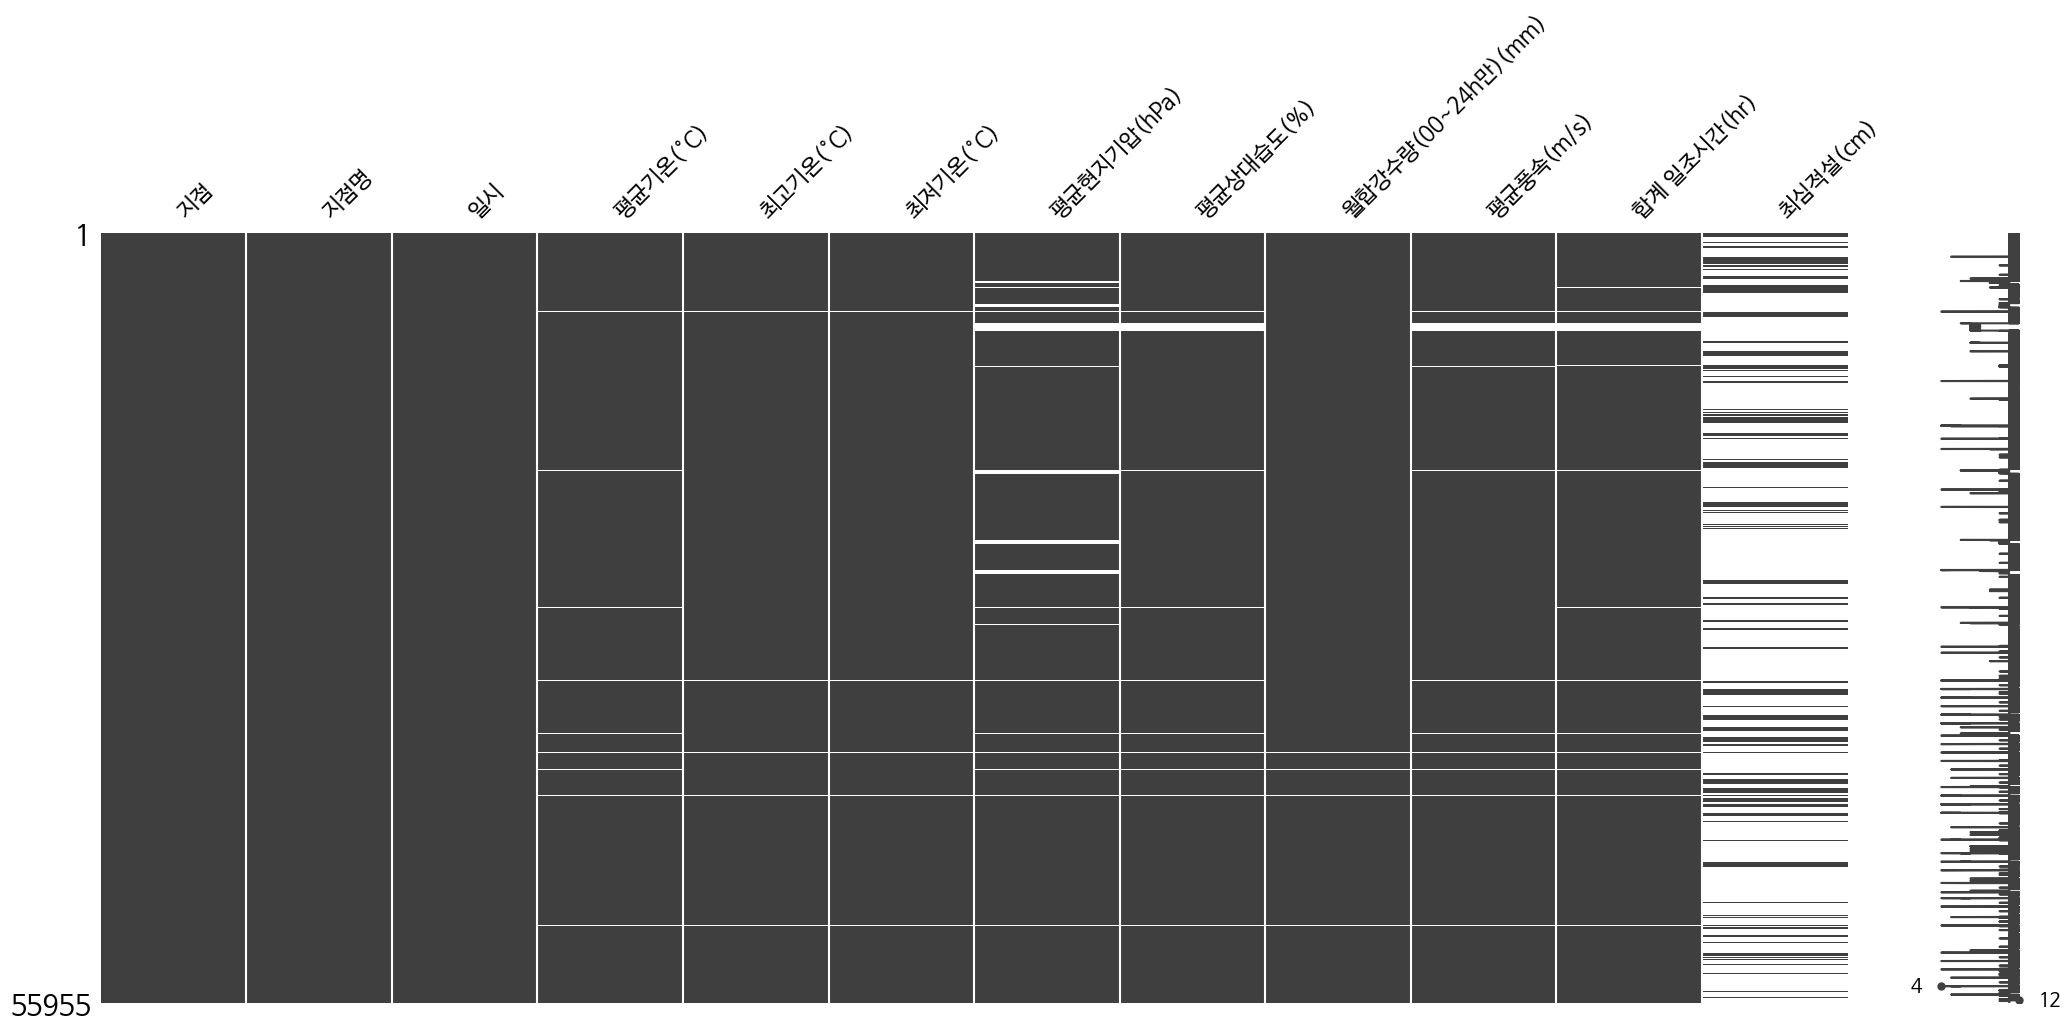

In [5]:
import missingno as msno
import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic') # 윈도우용 폰트-코랩용은 해당폰트 지정

msno.matrix(df)
plt.show() #결측데이터를 흰 부분으로 시각화 해준다

- **열에 결측 데이터 시각화**

In [ ]:
msno.bar(df)
plt.show()

---

#### 2. 컬럼명 변경하기

In [ ]:
df.columns
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
       '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.head(3)

#### 3. 컬럼 추가하기
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [ ]:
df.insert(3,'신규2',df['지점'])
df

In [ ]:
df.insert(3,'검색일자',df['일시'])
df

In [ ]:
df

In [ ]:
df.head(3)

- **문자열에서 특정 문자 제거**: '검색일자' 값중에 '년도-월-일' 형태로 되어 있는 구조에서  '-'기호를 제거

In [ ]:
df['검색일자']= df['검색일자'].str.replace(pat=r'-',repl=r'',regex=True)
df.head(2)

In [ ]:
df.info()

- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [ ]:
df['검색일자'] = df['검색일자'].apply('int64')
df.dtypes

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [ ]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes

In [ ]:
# 년월 추가
df.insert(3,'년도',df['일시'].str[0:4])
df

#### 4. 컬럼 삭제

In [ ]:
# df.drop(['신규','신규2'], axis=1, inplace=True)
df.drop('신규2', axis=1, inplace=True)
df.drop('검색일자', axis=1, inplace=True)
df.head(3)

#### 5. 특정 조건 검색

In [ ]:
print( '#지점명 개수: ', len( set(df['지점명']) ) )
print( '#지점명: ', set( df['지점명'] ) )

In [ ]:
# 특정년도 데이터
df_2023 = df.query(" 년도 == '2023' ")
# df_2023 = df[ df['년도']=='2023' ]

In [ ]:
print( '#지점명 개수: ', len( set(df_2023['지점명']) ) )
print( '#지점명: ', set( df_2023['지점명'] ) )

In [ ]:
# 년도=='2023'이면서 전라북도 관측소 데이터만 추출하기
df.query("년도 == '2023' and 지점명 in ('고창','고창군','전주','정읍','장수') ")
df_2023.query(" 지점명 in ('고창','고창군','전주','정읍','장수')")

- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [ ]:
df[df.지점명 == '제주' ]

# df.query(" 지점명 == '제주' ")

# df.iloc[ df.index[ df['지점명'] == '제주' ] ]

- **또는(|) , 포함(in)** 조건 사용: 강릉 또는 속초 데이터 추출

In [ ]:
# 또는(|) 사용
df.query(" 지점명=='제주' | 지점명=='서귀포' ")
df.head()

# df.query(" 지점명=='제주' | 지점명=='서귀포' ").head()

# df.query(" 지점명 in ('제주','서귀포') ").head(2)

- **그리고(&)** 조건 사용

In [ ]:
df[ (df.지점명 == '제주' ) & (df.최고기온 >10) ]

# df.query(" 지점명=='제주' & 최저기온 <= 0 ")

### [실습문제] 관측 지점이 제주도인 데이터 검색

In [ ]:
# 포함(in) 사용
df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")

- **min()** : 최초 측정월, 마지막 측정월

In [ ]:
# 측정월 최소, 최대
print ( '최초 측정일시: ', min(df['일시']) )
print ( '최초 측정일시: ', df['일시'].min() )
print ( '최근 측정일시: ', max(df['일시']) )
print ( '최근 측정일시: ', df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
# df['일시'].min()
# df.query(" 일시 == '1904-04-01'")

df.query(f" 일시 == '{ df['일시'].min() }' ")
df[ df['일시'] == df['일시'].min() ]

In [ ]:
# 전주 최초 측정일
df_junjoo = df.query(f" 지점명 == '전주' ")
df_junjoo['일시'].min()

- **max()** : 최근 측정 월 검색

In [ ]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

In [ ]:
df.query(f" 지점명 == '전주' & 일시 == '{ df['일시'].min() }' ")

In [ ]:
df.query(f" 지점명 in ('제주','성산','고산','성산포','서귀포') & 일시 == '{ df['일시'].max() }' ")

### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [ ]:
# 컬럼 추출
df['최고기온'].max()
df.최고기온.max()


# 행 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]

In [ ]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

In [ ]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

### [실습]: 가장 추웠던 날짜와 온도는?

In [ ]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()

###  [실습] : 'OO'에서 가장 더웠던 날짜와 기온?

###  [실습] : 'OO'에서 가장 추웠던 날짜와 기온은?

--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [ ]:
df.groupby(['지점명'], as_index=False).mean()
df.groupby('지점명').mean()

In [ ]:
df.groupby(['지점명'], as_index=False).count()

#### #그룹핑(컬럼1개): 지점별  평균기온

In [ ]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

In [ ]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

In [ ]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

In [ ]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

In [ ]:
df_temp = df.groupby('지점명').aggregate({'평균기온':'mean'})
df_temp.plot()

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [ ]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

In [ ]:
df_temp = df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df_temp.plot()

### [실습문제] : 지점별 최고기온?

- 인텍스를 초기화 하는 방법

In [ ]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

### [실습문제] : 지점별 년도별 최다 월합강수량?

### [실습문제]  OO 지역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

#### # DataFrame에서 한 행씩 불러오기
!!![주의]!!! 데이터가 많을 경우 실행하지 않도록

In [ ]:
# 한 행씩 불러오기  ---->
# for i, row in df_t.iterrows():
#     print(i, row)
#     print(i, row['지점명'], row['최고기온'])

#### 6.가공된 파일 신규 저장하기

In [ ]:
# 가공된 데이터 신규 파일로 저장하기
file = 'data/weather_data2.csv'
df.to_csv(file, encoding='cp949', mode='w', index=True)

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기




# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)


# 3.지점별 평균 구하기(지점 30개만 추출)
df_mean =

plt.plot(df_mean, '^', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus'] = False

# 1.데이터 불러오기
file = 'data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3.전주지역 데이터만 추출
df_junju =  df.query(" 지점명 == '전주'")
df_junju = df_junju.groupby('년도').aggregate({'평균기온':'mean', '최고기온':'max', '최저기온':'min' })
df_junju

plt.plot(df_junju)
plt.xticks(rotation=45)
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = 'data/weather_data2.csv'
df = pd.read_csv(file, encoding='CP949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 지점별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

In [ ]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


In [ ]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['axes.unicode_minus'] = False

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

In [ ]:
# 3. 그래프로 시각화하기
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

In [ ]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax1.set_ylabel('평균상대습도', color = 'green', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)
ax2.set_ylabel('월합강수량', color = 'deeppink', rotation = 270)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

plt.savefig('image/graph.png')

plt.show()

-------

---------

끝!